<a href="https://colab.research.google.com/github/AkaluTeklu/Galaxy-image-classification/blob/main/Galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
### 1. Loading galaxy dataset from local machine
### 2. Preparing the data
#### . Preprocessing and transformation
#### . Spliting the dataset into train, validation, and test
### 3. Model training
### 4. Analyzing the each models on validation set
### 5. Evaluating the system on test set




## Get the data

In [18]:
%%capture
!pip install fitsio seaborn

In [19]:
import zipfile
import os,glob
import numpy as np
import fitsio
from matplotlib import pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
from google.colab import files

uploaded = files.upload()


Saving data.zip to data (4).zip


In [ ]:
print(uploaded.keys())


dict_keys(['data (3).zip'])


In [22]:
import io
import zipfile

zip_file_key = next(iter(uploaded))

with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_key]), 'r') as zip_ref:
    zip_ref.extractall("/content/data/")



In [ ]:
!ls "/content/data/data"

data-COSMOS-10000-id.txt  Galaxy.py  image  main.py  new_image	Untitled.ipynb


### Loading dataset

In [29]:
# Specifying path to the training and validation data folder
path_to_img = "/content/data/data/image/*"
mycatalog_path = "/content/data/data/data-COSMOS-10000-id.txt"

# Initialization of lists to store images and morphological types
X = []
Y = []

# Loading relevant data from the catalog
ids, mod = np.loadtxt(mycatalog_path, unpack=True, usecols=(0, 3))

# Loading and displaying only the first 5 images
count = 0
for one in glob.glob(path_to_img):
    # Extracting the ID from the filename
    idi = int(one.split('/')[-1].split('_')[0])
    modi = mod[ids == idi][0]

    # Ignoring outliers (mod == 0)
    if modi > 0:
        # Adding or appending the image in to the raw_data
        data = fitsio.read(one)
        X.append(data)
        # Adding the morphological type
        Y.append(modi)

        # Print some of the results in the workspace
        if count < 5:
            print(one)
            print(idi)
            print(modi)
            print("----")
            count += 1




/content/data/data/image/3849_0850_149.5174713_2.043659_acs_I_mosaic_30mas_sci.fits
3849
2.0
----
/content/data/data/image/0346_149.4932098_1.905137_acs_I_mosaic_30mas_sci.fits
346
2.0
----
/content/data/data/image/3772_0773_149.4785156_2.660748_acs_I_mosaic_30mas_sci.fits
3772
2.0
----
/content/data/data/image/3692_0693_149.4909821_2.656707_acs_I_mosaic_30mas_sci.fits
3692
2.0
----
/content/data/data/image/3342_0343_149.4958496_1.739826_acs_I_mosaic_30mas_sci.fits
3342
2.0
----


### Loading testing dataset

In [32]:
# Specifying path to the training and validation data folder
path_to_new_img = "/content/data/data/new_image/*"
mycatalog_path = "/content/data/data/data-COSMOS-10000-id.txt"

# Initialization of lists to store images and morphological types
X_test = []
Y_test = []

# Loading relevant data from the catalog
ids, mod = np.loadtxt(mycatalog_path, unpack=True, usecols=(0, 3))

# Loading and displaying the testing images
count = 0
for one in glob.glob(path_to_new_img):
    # Extracting the ID from the filename
    idi = int(one.split('/')[-1].split('_')[0])
    modi = mod[ids == idi][0]

    # Ignoring outliers (mod == 0)
    if modi > 0:
        # Adding or appending the image in to the raw_data
        data = fitsio.read(one)
        X_test.append(data)
        # Adding the morphological type
        Y_test.append(modi)

        # Display some of the results
        if count < 5:
            print(one)
            print(idi)
            print(modi)
            print("----")
            count += 1



/content/data/data/new_image/0893_150.1253700000_2.2813030000_acs_I_mosaic_30mas_sci.fits
893
2.0
----
/content/data/data/new_image/0436_150.1348800000_2.2879060000_acs_I_mosaic_30mas_sci.fits
436
2.0
----
/content/data/data/new_image/0844_150.1853100000_2.2822380000_acs_I_mosaic_30mas_sci.fits
844
1.0
----
/content/data/data/new_image/0574_150.1858300000_2.2888900000_acs_I_mosaic_30mas_sci.fits
574
2.0
----
/content/data/data/new_image/0573_150.1437500000_2.2863410000_acs_I_mosaic_30mas_sci.fits
573
2.0
----


## Preparing the data

In [34]:
# Converting lists to numpy arrays for easier manipulation
X = np.asarray(X)
Y = np.asarray(Y)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

In [36]:
X.shape

(3992, 101, 101)

In [35]:
X_test.shape

(998, 101, 101)

The shape of X is (3992, 101, 101) indicates the data is a three-dimensional array with 3992 number of samples or instances and  (101, 101) 2D height and width of each sample, respectively. So, for each of the 3992 samples, we have a 2D array with dimensions 101x101. Furthermore, there are 998 samples instances in the testing dataset.


In [ ]:
Y.shape

(3992,)

In [ ]:
Y_test.shape

(998,)

Each element represents the morphological type associated with a corresponding image in `X`. In another words, each element in `Y` is the class label for the corresponding image in `X`.



## Normalization and Transformation

In [38]:
#######################################################
# DATA TRANSFORMATION
#######################################################

# Normalizing the data

X_norm = np.asarray([(img-img.mean())/img.std()for img in X])
X_test_norm=np.asarray([(img-img.mean())/img.std()for img in X_test])

# Transformating the data into 1D array
X = X_norm.reshape((X_norm.shape[0],-1))
X_test=X_test_norm.reshape((X_test_norm.shape[0],-1))

In [ ]:
X.shape

(3992, 10201)

In [ ]:
X_test.shape

(998, 10201)

In [ ]:
X.mean()

1.9793524885430543e-18

 The pixel values of the images are standardized or brought into common range, then each image is flattened into a one-dimensional array. The resulting one dimensional array X can be used as input to  models.

In [39]:
# Converting the 1D numpy array into data frame
data_frame = pd.DataFrame(X)

The numpy array dataset is converted into data frame to get some insight about the data.

In [ ]:
data_frame.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
10196    float64
10197    float64
10198    float64
10199    float64
10200    float64
Length: 10201, dtype: object

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Columns: 10201 entries, 0 to 10200
dtypes: float64(10201)
memory usage: 310.7 MB


In [41]:
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200
0,0.548368,0.461134,0.700984,-0.754359,-0.720755,-0.607937,-1.477445,-1.465465,0.085986,0.193779,...,0.746385,-0.283524,-0.949808,-1.208499,0.058830,1.214003,-1.328225,-0.915991,-0.831105,-1.663096
1,-0.730576,-0.758582,-0.774874,-0.551464,-0.403909,-0.333408,-0.426171,-0.662191,-0.378813,-0.385022,...,-0.778501,-0.684251,-0.975496,-0.760636,-0.549450,-0.458831,-0.619236,-0.667996,-0.629264,-0.361483
2,0.687152,-0.286550,-0.452458,-0.539455,-0.515386,0.321909,0.278874,-0.273259,0.146783,0.641317,...,-0.116178,-0.321143,-0.554318,-0.652513,-0.666906,-0.774979,0.663933,1.641042,0.971285,0.492245
3,-0.623697,-0.420118,-0.271525,-0.363113,-0.280487,0.102805,-0.046593,-0.079832,-0.209742,-0.266492,...,-0.294981,-0.181471,-0.377964,-0.469405,-0.279363,-0.235175,-0.245428,-0.459109,-0.503293,-0.263805
4,0.121595,0.030840,-0.035378,0.190549,-0.137464,-0.466884,-0.811613,-0.105939,-0.024337,-0.152415,...,-0.801706,-0.386322,-0.266369,-0.265156,0.085977,0.050071,-0.480858,-0.688502,-0.570919,-0.673688


## Spliting dataset

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

Here 80%  of the data is used to train the models to learn patterns and relationships within the data during this phase.

 After training the model on the training set, the remaining 20% are used as validation set to fine-tune and optimize the model's hyperparameters. This helps prevent overfitting (model fitting the training data too closely and not generalizing well to new data) or underfitting (model not capturing the underlying patterns in the data).

 Once the best-performing model is selected using the validation set, then evaluate its performance on the test set. The test set is unseen data that the model has not encountered during training or validation. It provides an unbiased assessment of how well the model generalizes to new, unseen data.

## Model Train

In this section, various machine learning models are designed and evaluated on the training and validation sets to select the best model among them. Hyperparameter tuning, regularization techniques, as well as simplifying or complexifying models based on their performance in the validation set are not addressed in this work due to the limited size of the dataset.

### Support Vector Machine(SVM)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


# model training
SVM_model = SVC()

train = SVM_model.fit(X_train, y_train)


### Evaluate SVM model on training set

The model's performance is assessed on the training set to identify potential overfitting or underfitting issues, providing insights into its generalization capabilities when subsequently evaluated on the validation set.

[[ 568  129    0]
 [  19 1950    0]
 [   0   68  459]]


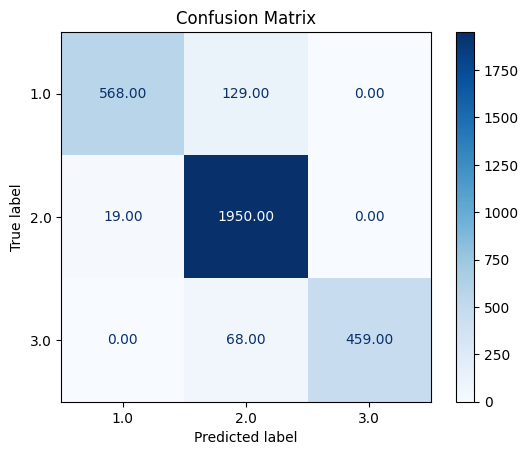

In [ ]:
# Predict the SVM model on the training set
y_pred = SVM_model.predict(X_train)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=SVM_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

As shown above the confusion matrix have high values on the main diagonal (true positive and true negative)which suggests the SVM model is making correct predictions, which is a key indicator of a well-performing model.

Accuracy: 0.9323520200438459
Sensitivity: 0.9323520200438459
Precision: 0.9363520451157701
F1 Score: 0.931094945971414


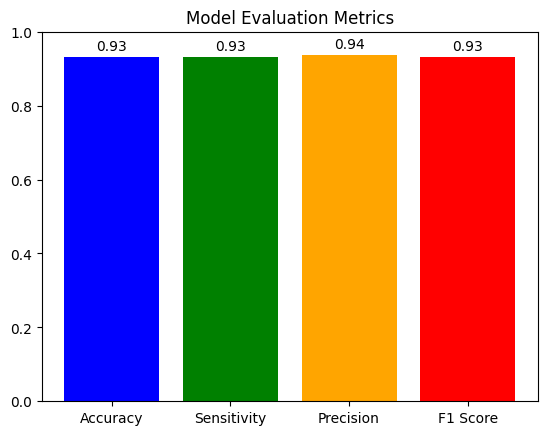

In [ ]:
# Performance metrics
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, y_pred)
sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
precision = metrics.precision_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

#Show the result on bar plot
labels = ['Accuracy', 'Sensitivity', 'Precision', 'F1 Score']
scores = [accuracy, sensitivity, precision, f1_score]

plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)

for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.title('Model Evaluation Metrics')
plt.show()



Precision answers the question from the instances predicted as positive, how many are truly positive?" (TP/(TP+FP))

Accuracy measures the overall correctness of the model by considering both positive and negative predictions.
(TP+TN)/(TP+FP+FN+TN)

Sensitivity answers the question, from all the actual positive instances, how many were predicted correctly as positive?"  TP/(TP+FN).

F1 score provides a balance between precision and sensitivity. 2(precision*sensitivity)/(precision+sensitivity).





### Evaluate SVM model on validation set

Let's see the performance of the model on validation set.

[[ 568  129    0]
 [  19 1950    0]
 [   0   68  459]]


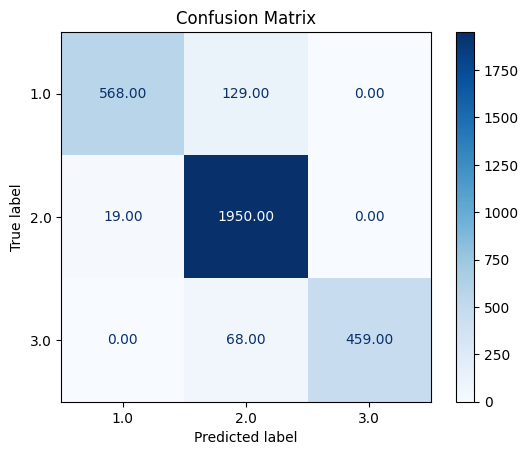

In [ ]:
# Predict the SVM model on the validation set

y_pred1 = SVM_model.predict(X_valid)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=SVM_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7546933667083855
Sensitivity: 0.7546933667083855
Precision: 0.802725951065539
F1 Score: 0.6963333022444758


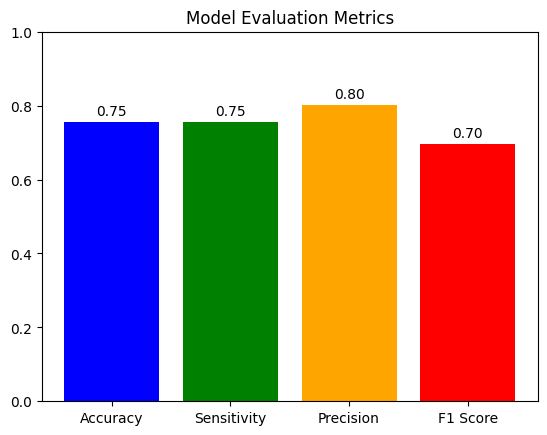

In [ ]:
# Performance metrics
from sklearn import metrics

accuracy = metrics.accuracy_score(y_valid, y_pred1)
sensitivity = metrics.recall_score(y_valid, y_pred1, average='weighted')
precision = metrics.precision_score(y_valid, y_pred1, average='weighted')
f1_score = metrics.f1_score(y_valid, y_pred1, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

#Show the result on bar plot
labels = ['Accuracy', 'Sensitivity', 'Precision', 'F1 Score']
scores = [accuracy, sensitivity, precision, f1_score]

plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)

for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.title('Model Evaluation Metrics')
plt.show()

The performance of the model on the validation set is slightly lower than on the training set, it suggests that the model might be overfitting. let's try to tune the hyperparameters using Grid Seach approach.

### AdaBoost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

### Evaluate AdaBoost model on training set

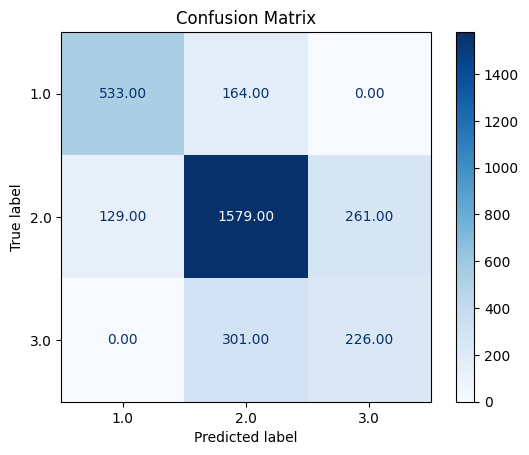

Confusion Matrix:
 [[ 533  164    0]
 [ 129 1579  261]
 [   0  301  226]]
Accuracy: 0.7322267460068901
Sensitivity: 0.7322267460068901
Precision: 0.7287204884802129
F1 Score: 0.7300757441707145


In [ ]:
y_pred = adaboost_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
classification_rep = classification_report(y_train, y_pred)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=adaboost_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)


accuracy = metrics.accuracy_score(y_train, y_pred)
sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
precision = metrics.precision_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")


### Evaluate AdaBoost model on validation set

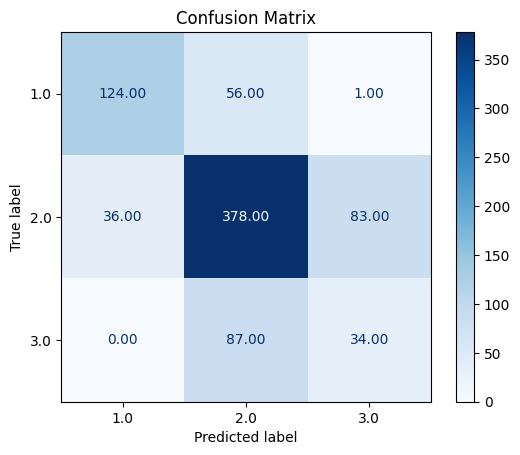

Confusion Matrix:
 [[124  56   1]
 [ 36 378  83]
 [  0  87  34]]
Accuracy: 0.6708385481852316
Sensitivity: 0.6708385481852316
Precision: 0.6704965442220324
F1 Score: 0.6697766589780254


In [ ]:
y_pred = adaboost_model.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=adaboost_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)


accuracy = metrics.accuracy_score(y_valid, y_pred)
sensitivity = metrics.recall_score(y_valid, y_pred, average='weighted')
precision = metrics.precision_score(y_valid, y_pred, average='weighted')
f1_score = metrics.f1_score(y_valid, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")


### K-Nearest Neighbors (KNN) Model

In [ ]:
#Modeling and training the model with KNN
from sklearn.neighbors import KNeighborsClassifier
k=5
KNN_model = KNeighborsClassifier(n_neighbors=k)
train=KNN_model.fit(X_train, y_train)

### Evaluate KNN model on training set

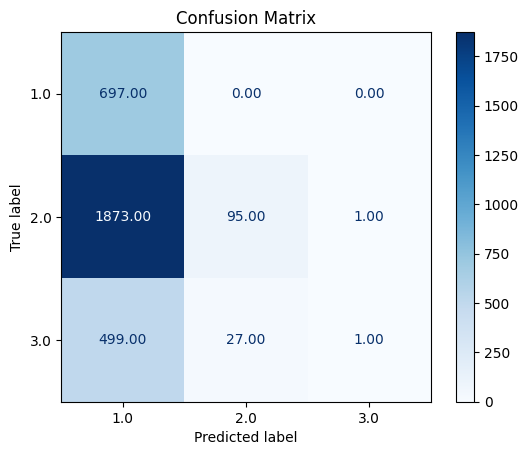

Confusion Matrix:
 [[ 697    0    0]
 [1873   95    1]
 [ 499   27    1]]
Accuracy: 0.24835577826495459
Sensitivity: 0.24835577826495459
Precision: 0.6122872661832903
F1 Score: 0.1374582456161611


In [ ]:
# Predict the SVM model on the training set
y_pred = KNN_model.predict(X_train)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=KNN_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)

accuracy = metrics.accuracy_score(y_train, y_pred)
sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
precision = metrics.precision_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

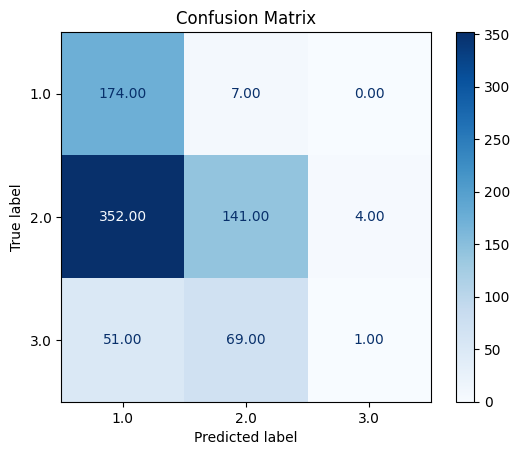

Confusion Matrix:
 [[174   7   0]
 [352 141   4]
 [ 51  69   1]]
Accuracy: 0.3954943679599499
Sensitivity: 0.3954943679599499
Precision: 0.5027757274442889
F1 Score: 0.35208057308824664


In [ ]:
y_pred = KNN_model.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=KNN_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)


accuracy = metrics.accuracy_score(y_valid, y_pred)
sensitivity = metrics.recall_score(y_valid, y_pred, average='weighted')
precision = metrics.precision_score(y_valid, y_pred, average='weighted')
f1_score = metrics.f1_score(y_valid, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

Comparing the performance of the KNN model with SVM and AdaBoost models, it is evident that the overall performance of the KNN model is significantly inferior.

### Random Forest

In [ ]:
#Modeling and training on Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 500, max_depth = 20)
y_train = y_train.ravel()
train=RF_model.fit(X_train, y_train)

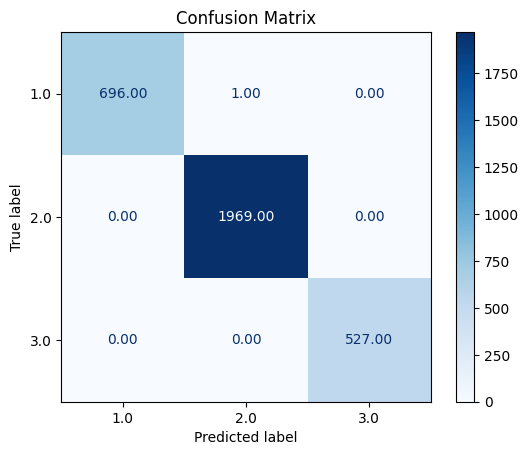

Confusion Matrix:
 [[ 696    1    0]
 [   0 1969    0]
 [   0    0  527]]
Accuracy: 0.9996868149076104
Sensitivity: 0.9996868149076104
Precision: 0.9996869738848148
F1 Score: 0.9996867422481132


In [ ]:
# Predict the SVM model on the training set
y_pred = RF_model.predict(X_train)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=RF_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)

accuracy = metrics.accuracy_score(y_train, y_pred)
sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
precision = metrics.precision_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

As observed, the performance of the Random Forest model appears to be nearly ideal, achieving close to 100% accuracy on the training set. This raises concerns about potential overfitting, where the model becomes overly complex and may memorize the training data, thereby failing to generalize effectively to new, unseen data. Overfitting occurs when the model captures noise or specific patterns in the training set that do not represent the underlying task.

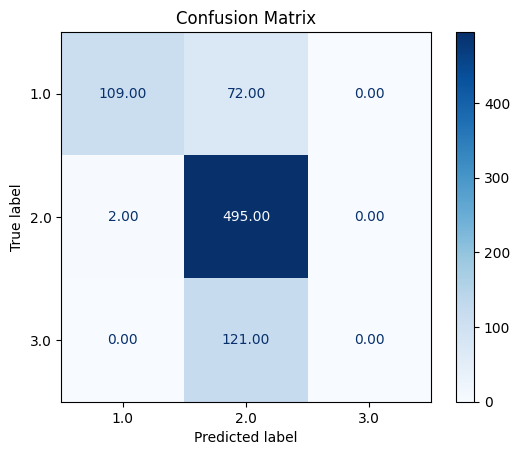

Confusion Matrix:
 [[109  72   0]
 [  2 495   0]
 [  0 121   0]]
Accuracy: 0.7559449311639549
Sensitivity: 0.7559449311639549
Precision: 0.6699858330403052
F1 Score: 0.6887926493863819


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = RF_model.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=RF_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)


accuracy = metrics.accuracy_score(y_valid, y_pred)
sensitivity = metrics.recall_score(y_valid, y_pred, average='weighted')
precision = metrics.precision_score(y_valid, y_pred, average='weighted')
f1_score = metrics.f1_score(y_valid, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

As suspected, the model exhibits signs of overfitting, as evidenced by a notable drop in accuracy to 75% on the validation set.

### Decision tree

In [ ]:
#Modeling decision tree
from sklearn.tree import DecisionTreeClassifier
CART=DecisionTreeClassifier()
train=CART.fit(X_train, y_train)

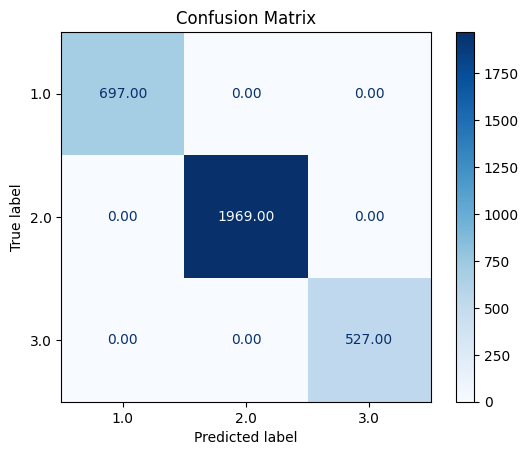

Confusion Matrix:
 [[ 697    0    0]
 [   0 1969    0]
 [   0    0  527]]
Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0


In [ ]:
# Predict the SVM model on the training set
y_pred = CART.predict(X_train)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=CART.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)

accuracy = metrics.accuracy_score(y_train, y_pred)
sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
precision = metrics.precision_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")


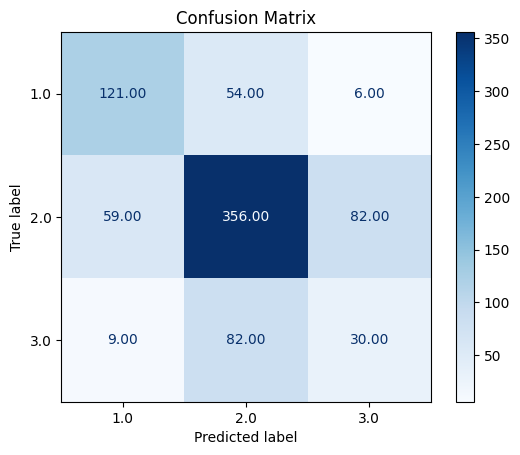

Confusion Matrix:
 [[121  54   6]
 [ 59 356  82]
 [  9  82  30]]
Accuracy: 0.6345431789737171
Sensitivity: 0.6345431789737171
Precision: 0.6336156507153635
F1 Score: 0.6339926790950832


In [ ]:
y_pred = CART.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=CART.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)


accuracy = metrics.accuracy_score(y_valid, y_pred)
sensitivity = metrics.recall_score(y_valid, y_pred, average='weighted')
precision = metrics.precision_score(y_valid, y_pred, average='weighted')
f1_score = metrics.f1_score(y_valid, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

### Deep Learning Model

In [ ]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(hidden_layer_sizes=[50, 50, 50], random_state=42)
train=ANN.fit(X_train, y_train)

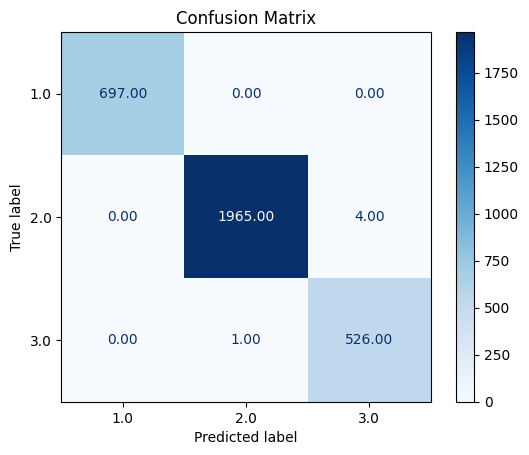

Confusion Matrix:
 [[ 697    0    0]
 [   0 1965    4]
 [   0    1  526]]
Accuracy: 0.998434074538052
Sensitivity: 0.998434074538052
Precision: 0.9984406876193037
F1 Score: 0.9984356998375846


In [ ]:
# Predict the SVM model on the training set
y_pred = ANN.predict(X_train)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=ANN.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)

accuracy = metrics.accuracy_score(y_train, y_pred)
sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
precision = metrics.precision_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

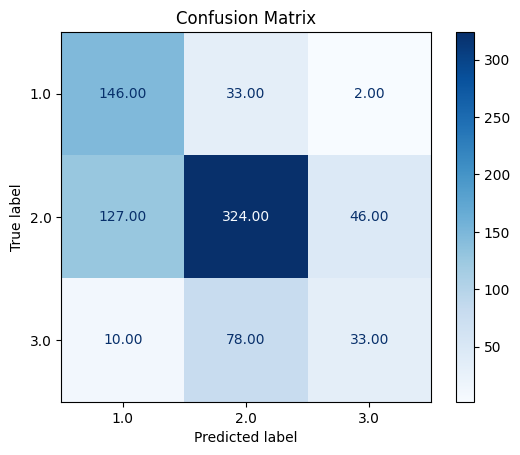

Confusion Matrix:
 [[146  33   2]
 [127 324  46]
 [ 10  78  33]]
Accuracy: 0.6295369211514393
Sensitivity: 0.6295369211514393
Precision: 0.6418694599673535
F1 Score: 0.6245224955542041


In [ ]:
y_pred = ANN.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=ANN.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)


accuracy = metrics.accuracy_score(y_valid, y_pred)
sensitivity = metrics.recall_score(y_valid, y_pred, average='weighted')
precision = metrics.precision_score(y_valid, y_pred, average='weighted')
f1_score = metrics.f1_score(y_valid, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

## All in One

[[ 548  149    0]
 [  29 1940    0]
 [   0  192  335]]


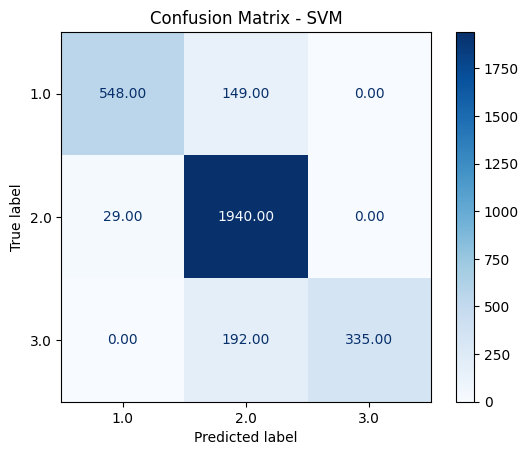

Model: SVM
Accuracy: 0.8841215158158472
Sensitivity: 0.8841215158158472
Precision: 0.8968404336765958
F1 Score: 0.8790527091507156


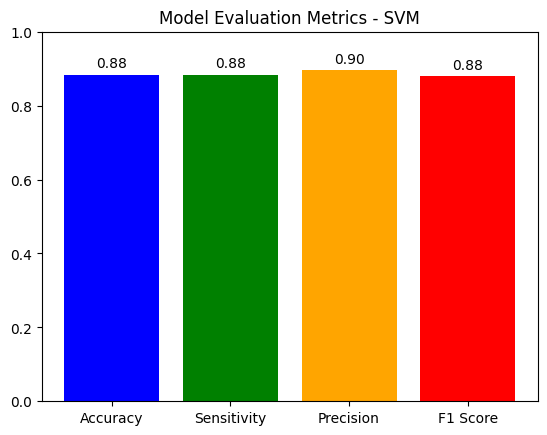

[[ 672   25    0]
 [1275  691    3]
 [ 263  247   17]]


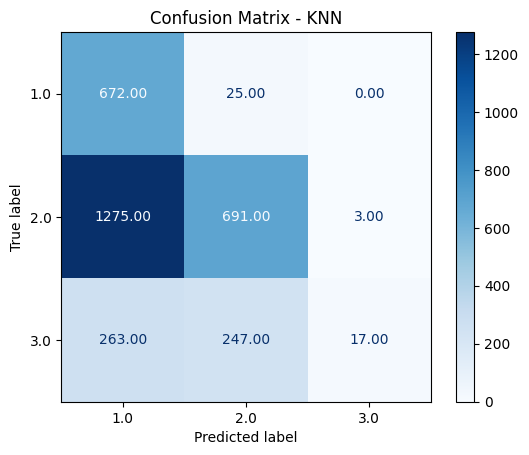

Model: KNN
Accuracy: 0.4321954274976511
Sensitivity: 0.4321954274976511
Precision: 0.6491522337972371
F1 Score: 0.4018452328250581


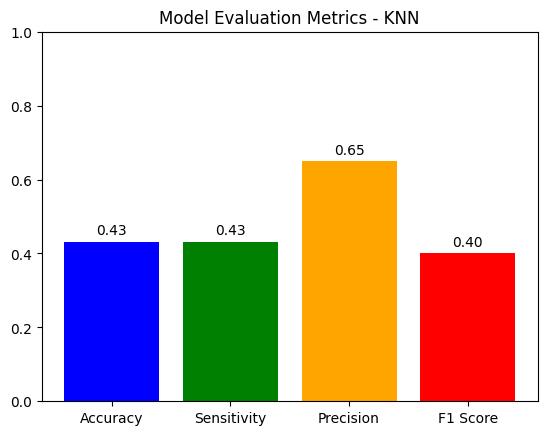

[[ 533  164    0]
 [ 129 1579  261]
 [   0  301  226]]


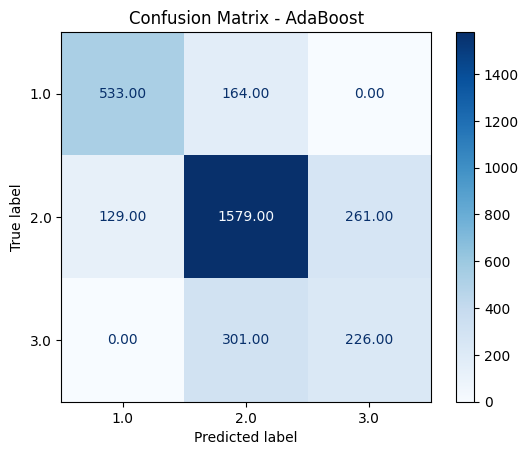

Model: AdaBoost
Accuracy: 0.7322267460068901
Sensitivity: 0.7322267460068901
Precision: 0.7287204884802129
F1 Score: 0.7300757441707145


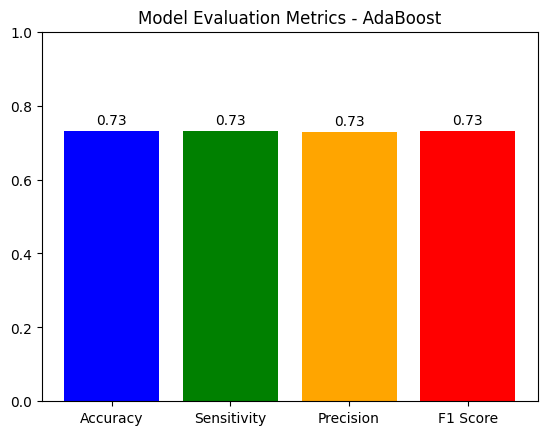

[[ 697    0    0]
 [   0 1969    0]
 [   0    0  527]]


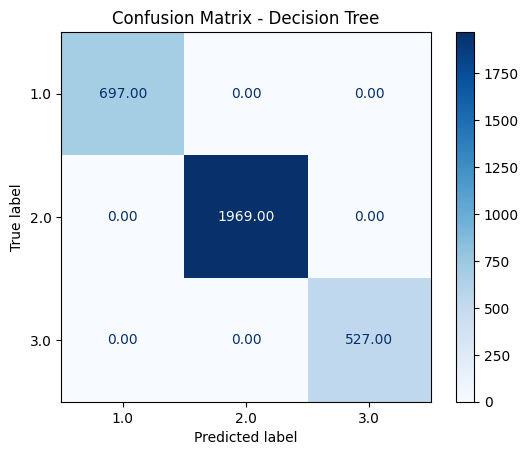

Model: Decision Tree
Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0


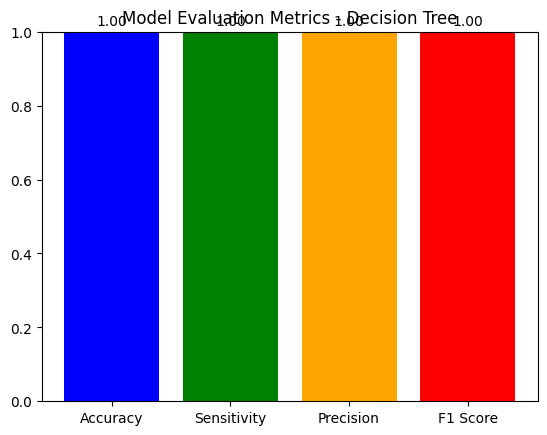

[[ 697    0    0]
 [   0 1969    0]
 [   0    0  527]]


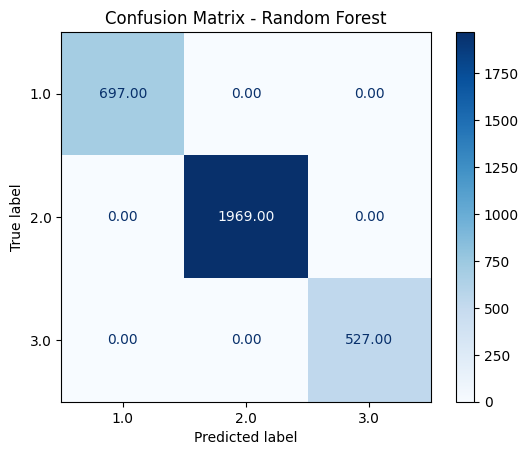

Model: Random Forest
Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0


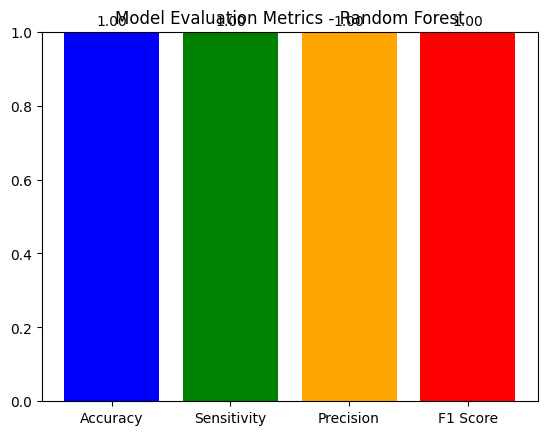

[[ 697    0    0]
 [   0 1965    4]
 [   0    1  526]]


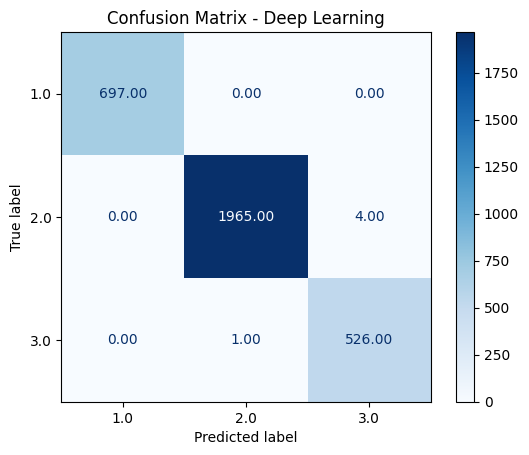

Model: Deep Learning
Accuracy: 0.998434074538052
Sensitivity: 0.998434074538052
Precision: 0.9984406876193037
F1 Score: 0.9984356998375846


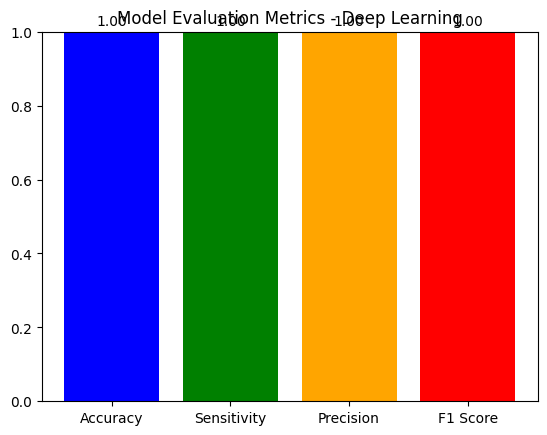

In [ ]:
# Define models
models = {
    'SVM': SVM_model,
    'KNN': KNN_model,
    'AdaBoost': adaboost_model,
    'Decision Tree': CART,
    'Random Forest': RF_model,
    'Deep Learning': ANN
}

# Evaluate and plot results for each model
for model_name, model in models.items():
    # Model predicting
    train = model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    # Display the confusion matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    print(conf_matrix)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format=".2f")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Performance metrics
    accuracy = metrics.accuracy_score(y_train, y_pred)
    sensitivity = metrics.recall_score(y_train, y_pred, average='weighted')
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1_score}")

    # Show the result on a bar plot
    labels = ['Accuracy', 'Sensitivity', 'Precision', 'F1 Score']
    scores = [accuracy, sensitivity, precision, f1_score]

    plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
    plt.ylim(0, 1)

    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.title(f'Model Evaluation Metrics - {model_name}')
    plt.show()

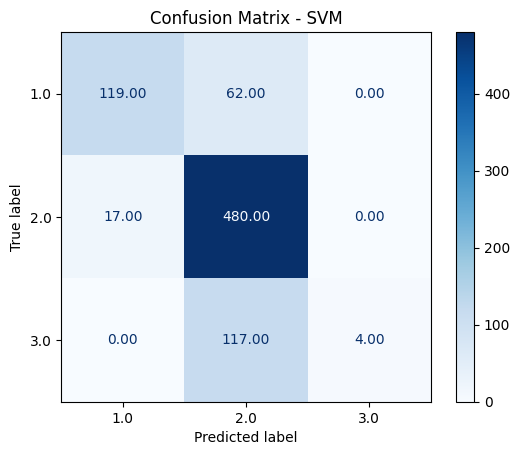

Model: SVM
Accuracy: 0.7546933667083855
Sensitivity: 0.7546933667083855
Precision: 0.802725951065539
F1 Score: 0.6963333022444758


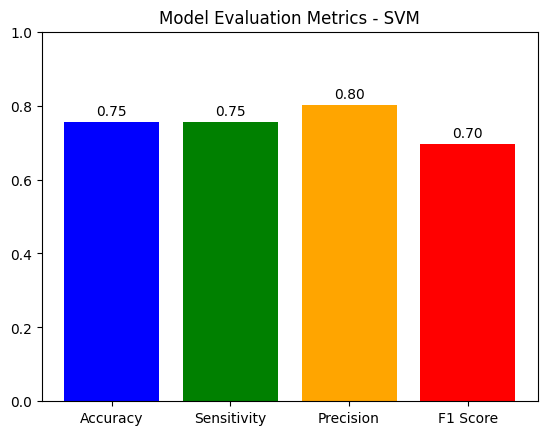

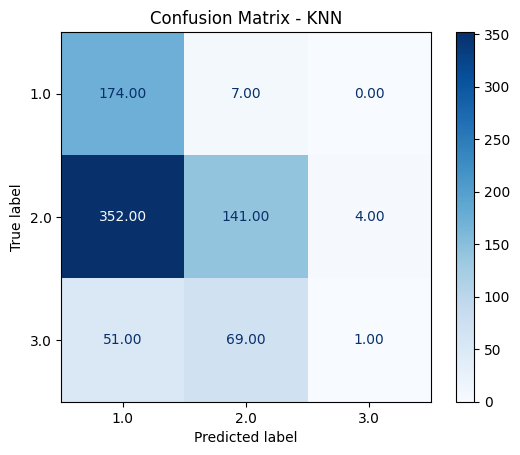

Model: KNN
Accuracy: 0.3954943679599499
Sensitivity: 0.3954943679599499
Precision: 0.5027757274442889
F1 Score: 0.35208057308824664


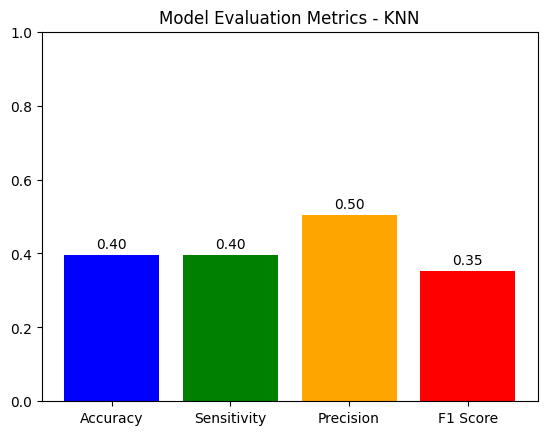

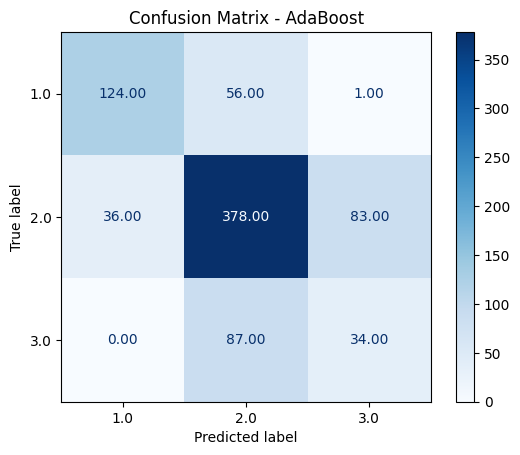

Model: AdaBoost
Accuracy: 0.6708385481852316
Sensitivity: 0.6708385481852316
Precision: 0.6704965442220324
F1 Score: 0.6697766589780254


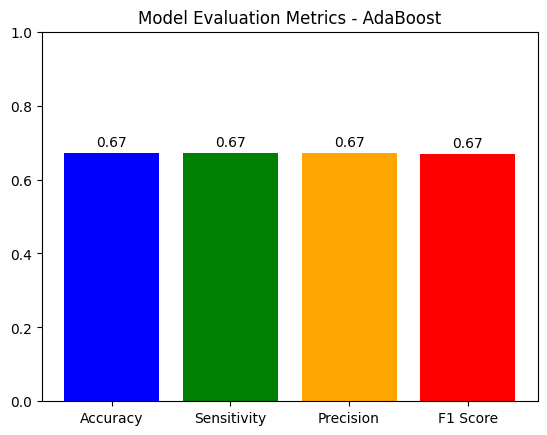

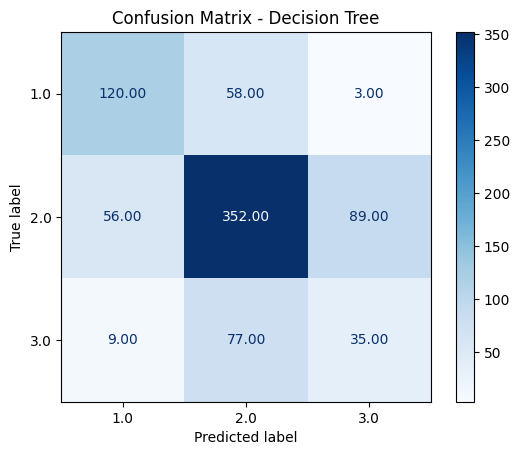

Model: Decision Tree
Accuracy: 0.6345431789737171
Sensitivity: 0.6345431789737171
Precision: 0.6382725759403599
F1 Score: 0.6363191316257487


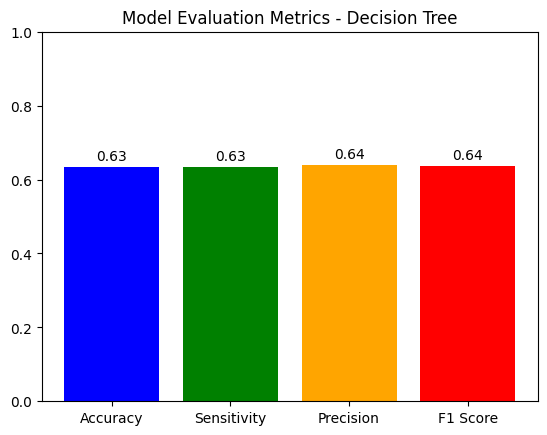

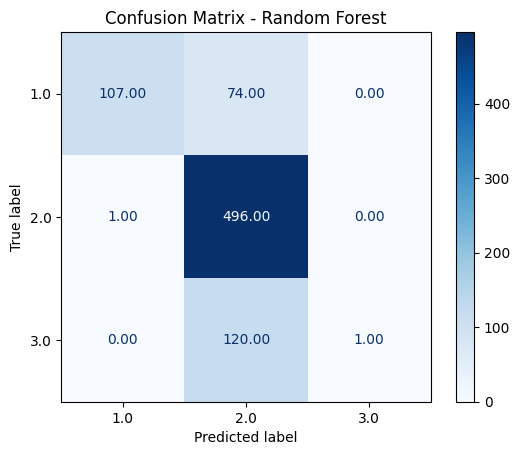

Model: Random Forest
Accuracy: 0.7559449311639549
Sensitivity: 0.7559449311639549
Precision: 0.8230135696996447
F1 Score: 0.6900679336060286


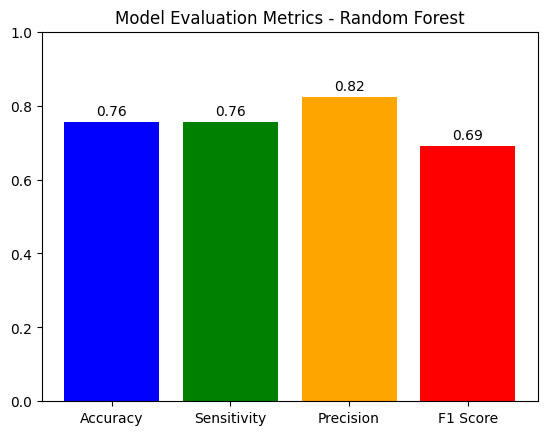

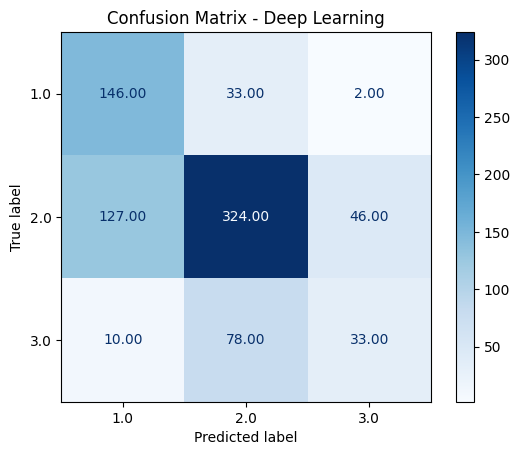

Model: Deep Learning
Accuracy: 0.6295369211514393
Sensitivity: 0.6295369211514393
Precision: 0.6418694599673535
F1 Score: 0.6245224955542041


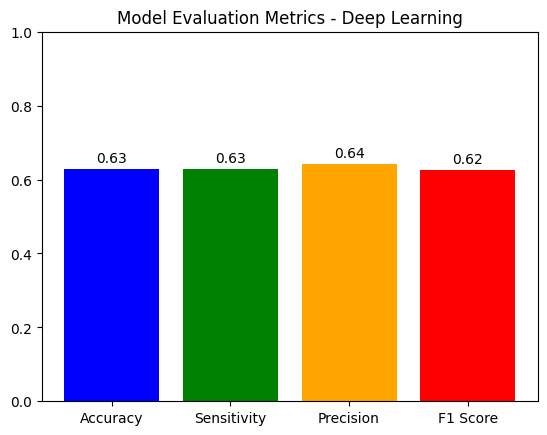

In [ ]:
 # Evaluate and plot results for each model
for model_name, model in models.items():
    # Model predicting
    train = model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)



    # Display the confusion matrix
    conf_matrix = confusion_matrix(y_valid, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format=".2f")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Performance metrics
    accuracy = metrics.accuracy_score(y_valid, y_pred)
    sensitivity = metrics.recall_score(y_valid, y_pred, average='weighted')
    precision = metrics.precision_score(y_valid, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_valid, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1_score}")

    # Show the result on a bar plot
    labels = ['Accuracy', 'Sensitivity', 'Precision', 'F1 Score']
    scores = [accuracy, sensitivity, precision, f1_score]

    plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
    plt.ylim(0, 1)

    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.title(f'Model Evaluation Metrics - {model_name}')
    plt.show()

Upon observation, the SVM model demonstrates commendable performance on both the training and validation sets. In light of this, we intend to enhance its predictive capabilities by fine-tuning hyperparameters using Grid Search. This systematic exploration of hyperparameter combinations will allow us to optimize the SVM model and improve its overall predictive accuracy.

Contrastingly, the KNN model exhibits signs of substantial underfitting, suggesting that it may be too simplistic to capture the underlying patterns in the data effectively. On the other hand, models such as Random Forest, Decision Tree, and Neural Network display indications of strong overfitting, wherein they have potentially memorized the training data, resulting in diminished generalization to new data.

Given these observations, the SVM model emerges as a more promising candidate for setting up our system. Its balanced performance on both training and validation sets, coupled with the potential for hyperparameter optimization through Grid Search, positions it as a favorable choice for robust and accurate predictions on unseen data.

### Tuning the SVM model using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
grid_par = {'C': [0.1, 1, 10, 100],
            'kernel': ['rbf']}

# Create an SVM classifier
SVM_model = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(SVM_model, grid_par, cv=10)

# Fit the model to the data and find the best hyperparameters
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [ ]:
# Get the best estimator (classifier) with optimized hyperparameters
from sklearn import metrics
best_SVM_model = grid_search.best_estimator_

# Predict the labels on the validation set using the best classifier
y_pred_best = best_SVM_model.predict(X_valid)

# Calculate performance metrics with the best classifier on the validation set
accuracy_best = metrics.accuracy_score(y_valid, y_pred_best)
sensitivity_best = metrics.recall_score(y_valid, y_pred_best, average='weighted')
precision_best = metrics.precision_score(y_valid, y_pred_best, average='weighted')
f1_score_best = metrics.f1_score(y_valid, y_pred_best, average='weighted')

print("Performance with Best Parameters on Validation Set:")
print(f"Accuracy: {accuracy_best}")
print(f"Sensitivity: {sensitivity_best}")
print(f"Precision: {precision_best}")
print(f"F1 Score: {f1_score_best}")


Performance with Best Parameters on Validation Set:
Accuracy: 0.753441802252816
Sensitivity: 0.753441802252816
Precision: 0.7344996597929953
F1 Score: 0.7350758562577357


## Evaluate the System

The system performance is examined on the SVM model as given below.

In [ ]:
# model training
SVM_model = SVC()

train = SVM_model.fit(X_train, y_train)

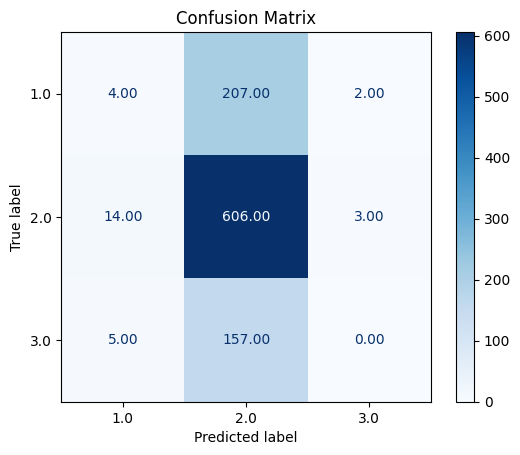

Confusion Matrix:
 [[  4 207   2]
 [ 14 606   3]
 [  5 157   0]]
Accuracy: 0.6112224448897795
Sensitivity: 0.6112224448897795
Precision: 0.42711213552160354
F1 Score: 0.482180934373455


In [ ]:
# Predict the SVM model on the training set
y_pred = SVM_model.predict(X_test)

# Display the confusion matrix

conf_matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=SVM_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n", conf_matrix)

accuracy = metrics.accuracy_score(Y_test, y_pred)
sensitivity = metrics.recall_score(Y_test, y_pred, average='weighted')
precision = metrics.precision_score(Y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(Y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")


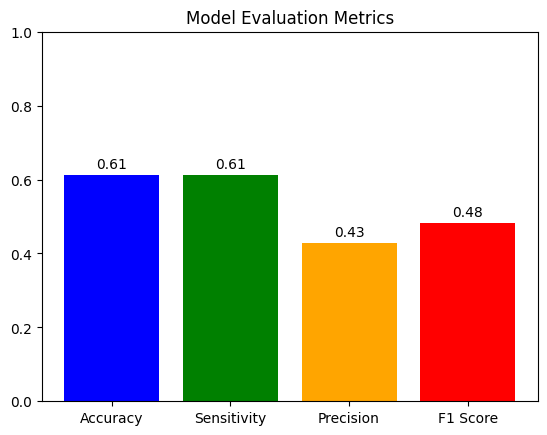

In [ ]:
#Show the result on bar plot
labels = ['Accuracy', 'Sensitivity', 'Precision', 'F1 Score']
scores = [accuracy, sensitivity, precision, f1_score]

plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)

for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.title('Model Evaluation Metrics')
plt.show()